In [4]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

df_rewards = pd.read_csv('./out/cumulated_reward.csv', index_col=[0, 1])
df_coverage = pd.read_csv('./out/coverage.csv', index_col=[0])
df_diversity = pd.read_csv('./out/diversity.csv', index_col=[0])

cumulated_reward = df_rewards.groupby(level=0, sort=False).last().T.reset_index(drop=True)
renamed = cumulated_reward.rename(columns={
    'MABTree 0.1-greedy': 'MABTree\n0.1-greedy',
    'MABTree 0.1-greedy MF': 'MABTree\n0.1-greedy MF',
    'MABTree Random': 'MABTree\nRandom',
    'MABTree UCB': 'MABTree\nUCB',
})

In [5]:
from scipy import stats

def test(**kwargs):
    anova = stats.f_oneway(*kwargs.values())
    if anova.pvalue < 0.01:
        anova_p = '< 0.01'
    elif anova.pvalue < 0.05:
        anova_p = '< 0.05'
    else:
        anova_p = 'non stat-sig'

    tukey_hsd = pd.DataFrame(
        columns=kwargs.keys(),
        index=kwargs.keys(),
        data=stats.tukey_hsd(*kwargs.values()).pvalue
    ).map(lambda x: '< 0.01' if x < 0.01 else '< 0.05' if x < 0.05 else 'non stat-sig')

    print(anova)

    return tukey_hsd

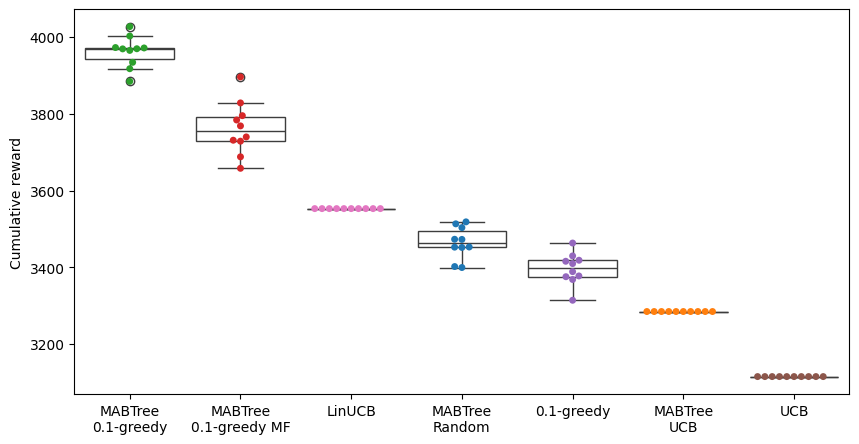

In [6]:
plt.figure(figsize=(10, 5))

rank = renamed.median().sort_values(ascending=False).index
sns.boxplot(data=renamed, color='white', order=rank)
sns.swarmplot(data=renamed, order=rank)
plt.ylabel('Cumulative reward')
plt.savefig('./out/cumulated_reward.pdf', bbox_inches='tight', format='pdf')
plt.show()

In [7]:
tukey_hsd = test(**cumulated_reward.to_dict(orient='list'))
tukey_hsd

F_onewayResult(statistic=np.float64(582.6924180023252), pvalue=np.float64(3.4093304850930084e-53))


,MABTree Random,MABTree UCB,MABTree 0.1-greedy,MABTree 0.1-greedy MF,0.1-greedy,UCB,LinUCB
MABTree Random,non stat-sig,< 0.01,< 0.01,< 0.01,< 0.01,< 0.01,< 0.01
MABTree UCB,< 0.01,non stat-sig,< 0.01,< 0.01,< 0.01,< 0.01,< 0.01
MABTree 0.1-greedy,< 0.01,< 0.01,non stat-sig,< 0.01,< 0.01,< 0.01,< 0.01
MABTree 0.1-greedy MF,< 0.01,< 0.01,< 0.01,non stat-sig,< 0.01,< 0.01,< 0.01
0.1-greedy,< 0.01,< 0.01,< 0.01,< 0.01,non stat-sig,< 0.01,< 0.01
UCB,< 0.01,< 0.01,< 0.01,< 0.01,< 0.01,non stat-sig,< 0.01
LinUCB,< 0.01,< 0.01,< 0.01,< 0.01,< 0.01,< 0.01,non stat-sig


In [8]:
tukey_hsd = test(**df_coverage.to_dict(orient='list'))
tukey_hsd

F_onewayResult(statistic=np.float64(27322.480484310734), pvalue=np.float64(1.404097949075241e-105))


,MABTree Random,MABTree UCB,MABTree 0.1-greedy,MABTree 0.1-greedy MF,0.1-greedy,UCB,LinUCB
MABTree Random,non stat-sig,< 0.01,< 0.01,< 0.01,< 0.01,< 0.01,< 0.01
MABTree UCB,< 0.01,non stat-sig,< 0.01,< 0.01,< 0.01,< 0.01,< 0.01
MABTree 0.1-greedy,< 0.01,< 0.01,non stat-sig,< 0.01,< 0.05,< 0.01,< 0.01
MABTree 0.1-greedy MF,< 0.01,< 0.01,< 0.01,non stat-sig,< 0.01,< 0.01,< 0.01
0.1-greedy,< 0.01,< 0.01,< 0.05,< 0.01,non stat-sig,< 0.01,< 0.01
UCB,< 0.01,< 0.01,< 0.01,< 0.01,< 0.01,non stat-sig,< 0.01
LinUCB,< 0.01,< 0.01,< 0.01,< 0.01,< 0.01,< 0.01,non stat-sig


In [9]:
tukey_hsd = test(**df_diversity.to_dict(orient='list'))
tukey_hsd

F_onewayResult(statistic=np.float64(36253.96060381692), pvalue=np.float64(1.9030877241514627e-109))


,MABTree Random,MABTree UCB,MABTree 0.1-greedy,MABTree 0.1-greedy MF,0.1-greedy,UCB,LinUCB
MABTree Random,non stat-sig,< 0.01,< 0.01,< 0.01,< 0.01,< 0.01,< 0.01
MABTree UCB,< 0.01,non stat-sig,< 0.01,< 0.01,< 0.01,< 0.01,non stat-sig
MABTree 0.1-greedy,< 0.01,< 0.01,non stat-sig,< 0.01,< 0.01,< 0.01,< 0.01
MABTree 0.1-greedy MF,< 0.01,< 0.01,< 0.01,non stat-sig,< 0.01,< 0.01,< 0.01
0.1-greedy,< 0.01,< 0.01,< 0.01,< 0.01,non stat-sig,< 0.01,< 0.01
UCB,< 0.01,< 0.01,< 0.01,< 0.01,< 0.01,non stat-sig,< 0.01
LinUCB,< 0.01,non stat-sig,< 0.01,< 0.01,< 0.01,< 0.01,non stat-sig


In [10]:
def highlight_max(s):
    d = s.sort_values(ascending=False)

    style = {
        d.index[0]: 'textbf:--rwrap ;',   # max
        d.index[1]: 'underline:--rwrap ;',  # second max
        d.index[-1]: 'textit:--rwrap ;',  # min
    }

    return [style.get(v, '') for v in s.index]

In [11]:
stacked = pd.concat([
    cumulated_reward.stack(),
    df_coverage.stack(),
    df_diversity.stack()
], axis=1, keys=['Cumulated reward', 'Coverage', 'Entropy']).droplevel(0).reset_index(names='Setup')

statistics = stacked.groupby('Setup', sort=False).agg(['mean', 'std'])
statistics.index.name = None

statistics.style.format('{:.2f}').apply(highlight_max, axis=0).to_latex(
    'out/summary.tex', 
    position='H', 
    position_float='centering', 
    caption='Mean and standard deviation of cumulated reward, coverage and entropy for each setup. For each metric, the best and second best setups are highlighted in bold and underlined, respectively. The worst setup is highlighted in italic.', 
    label='tab:summary', 
    hrules=True,
    multicol_align='c',
)

statistics

Cumulated reward             Coverage            \
                                  mean        std      mean       std   
MABTree Random             3463.923977  41.517825  0.808360  0.001274   
MABTree UCB                3284.783678   0.000000  0.392817  0.000000   
MABTree 0.1-greedy         3961.241758  40.808001  0.336105  0.001017   
MABTree 0.1-greedy MF      3761.618552  68.975573  0.725450  0.009374   
0.1-greedy                 3396.079232  40.840071  0.330957  0.001335   
UCB                        3115.335922   0.000000  0.443045  0.000000   
LinUCB                     3552.908403   0.000000  0.486934  0.000000   

                        Entropy            
                           mean       std  
MABTree Random         4.657811  0.001507  
MABTree UCB            4.003464  0.000000  
MABTree 0.1-greedy     2.719632  0.017038  
MABTree 0.1-greedy MF  4.194908  0.025700  
0.1-greedy             2.612471  0.014741  
UCB                    4.109575  0.000000  
LinUCB                 4.007061  0.000000

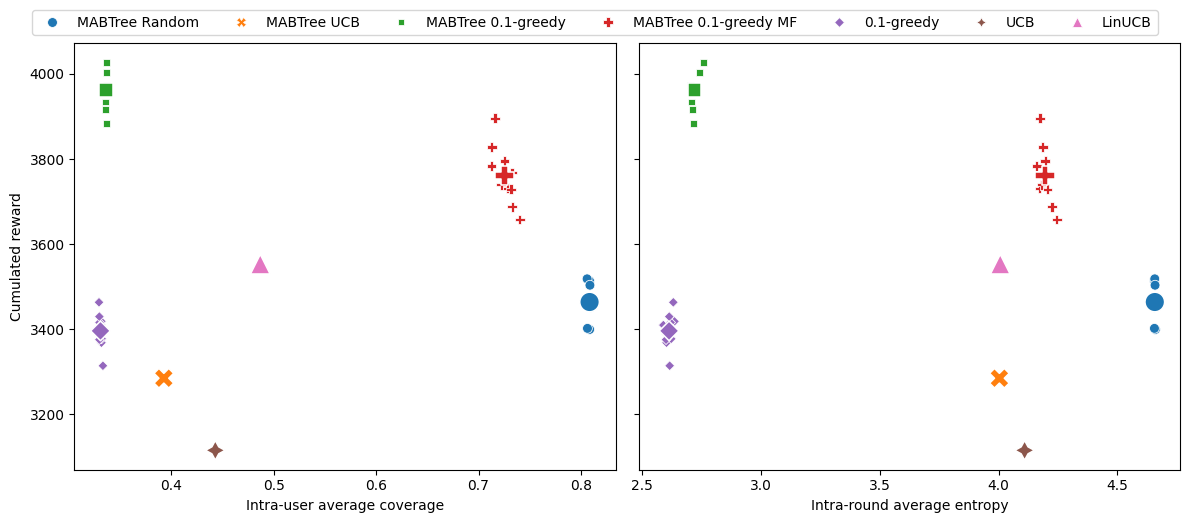

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

sns.scatterplot(data=stacked, x='Coverage', y='Cumulated reward', hue='Setup', ax=ax1, style='Setup', s=50)
sns.scatterplot(data=stacked, x='Entropy', y='Cumulated reward', hue='Setup', ax=ax2, style='Setup', s=50)

sns.scatterplot(data=stacked.groupby('Setup', sort=False).mean().reset_index(), x='Coverage', y='Cumulated reward', hue='Setup', ax=ax1, style='Setup', s=200, legend=False)
sns.scatterplot(data=stacked.groupby('Setup', sort=False).mean().reset_index(), x='Entropy', y='Cumulated reward', hue='Setup', ax=ax2, style='Setup', s=200, legend=False)

ax1.set_xlabel('Intra-user average coverage')
ax2.set_xlabel('Intra-round average entropy')

artists, labels = ax1.get_legend_handles_labels()
ax1.legend().remove()
ax2.legend().remove()
fig.legend(artists, labels, loc='upper center', ncol=7, bbox_to_anchor=(0.5, 1.05))
fig.tight_layout()

plt.savefig('./out/reward_vs_coverage_entropy.pdf', bbox_inches='tight', format='pdf')